 <h1 align = "center"> <font color=red> BANK PERSONAL LOAN - Exploratory Data Analysis </font> </h1> 

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; font-size: 25px"> 1. OVERVIEW</div>

This analysis is to employ various techniques in Classification problem to build ML model to predict customer who takes loan on phone based on their characteristics such as Demographics info, financial status,.. It also provides the evaluation on contribution of each factor in predictive model. The analysis is splited into 2 files: Exploratory Data Analysis and Building Predictive Model 
    

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; font-size: 25px"> 2. SET UP </div>

## <font color=red> 2.1. Import library

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
from pathlib import Path
import os

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Dataframe manipulation
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Modelling Helpers:
from sklearn import model_selection
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score,ShuffleSplit,cross_validate

# math & statsmodels
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels as statm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import math
from math import sqrt

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# sns.set(style = 'whitegrid',context = 'notebook')
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

print("Setup complete...")

C:\Users\Mai\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Setup complete...


## <font color=red> 2.2. Define Function

In [2]:
def calculate_class_ratio(data, var):
    class_0 = data[data['Class']==0].groupby(var).count()['Class']
    class_1 = data[data['Class']==1].groupby(var).count()['Class']
    class_ratio = class_1/class_0    
    
    return class_ratio


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; font-size: 25px"> 3. DATA UNDERSTANDING </div>

## <font color=red> 3.1. Data Collection
    
There are many LendingClub data sets on Kaggle. This project uses a subset of the Lending Club datatset obtained from this link:    

In [3]:
data_file = 'Bank_Personal_Loan_Modelling.csv'
df = pd.read_csv(data_file)
print(df.shape)
df.head()

(5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## <font color=red> 3.2. Data Description
    
The dataset has 14 columns whose descriptions are given below.    

- **ID:** Customer ID
- **AGe:** Customer's age in completed years
- **Experience:** Years of professional experience
- **Income:** Annual income of the customer
- **ZIP_Code:** Home address ZIP Code
- **Family:** Family size of the customer
- **CCAVG:** Avg.spending on credit cards per month
- **Education:** Education level
- **Mortgage:** Value of house mortgage if any. ($000)
- **Personal_Loan:** Did this customer accept the personal loan offered in the last campaign?
- **Securities_account:** Does the customer have a securities account with the bank?
- **CD_Account:** Does the customer have a certifite of deposit(CD) account with the bank?
- **Online:** Does the customer use Internet banking of facilities?
- **CreditCard:** Does the customer use a credit card issued by universal bank?    

## <font color=red> 3.3. Data Profiling

### <font color=blue>1. Data Structure & Descriptive Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
pd.options.display.float_format = '{:.3f}'.format
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.000,2500.500,1443.520,1.000,1250.750,2500.500,3750.250,5000.000
Age,5000.000,45.338,11.463,23.000,35.000,45.000,55.000,67.000
Experience,5000.000,20.105,11.468,-3.000,10.000,20.000,30.000,43.000
Income,5000.000,73.774,46.034,8.000,39.000,64.000,98.000,224.000
ZIP Code,5000.000,93152.503,2121.852,9307.000,91911.000,93437.000,94608.000,96651.000
Family,5000.000,2.396,1.148,1.000,1.000,2.000,3.000,4.000
CCAvg,5000.000,1.938,1.748,0.000,0.700,1.500,2.500,10.000
Education,5000.000,1.881,0.840,1.000,1.000,2.000,3.000,3.000
Mortgage,5000.000,56.499,101.714,0.000,0.000,0.000,101.000,635.000
Personal Loan,5000.000,0.096,0.295,0.000,0.000,0.000,0.000,1.000


**Summary**
<div style="float:left;margin-left:20px; max-width:100%; text-align:justify;
          padding:15px;
          background-color:#E5E4E2;
          margin:0;
          border-radius: 13px 13px;
          overflow:hidden;">

<p> 📌 Data Type: The dataset has 14 columns and 5000 rows. All attributes are numerical <br>
        +  Field 'ID' is not a feature, it stores unique number that represent for each customer => it is removed from the list of features used for training model <br>
        + Customer has age from 23 to 67 <br>
        + Field 'Experience' has value from -3 to 43, value with negative data is incorrect and should be fixed <br>
        + Field Zip Code should be categorical data type
        + Fields Family, CCAvg, Education have discrete values   <br>
        + Fields Personal Loan, Securities Account, CD Account, Online, CreditCard have binary value

<p> 📌 Features Type: can be classified to 2 groups: <br>    
        + Customer basic info: 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'Education' <br>
        + Financial Status: 'CCAvg', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'
    
<p> 📌 Missing Data: There is no missing data in all columns    
</div>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; font-size: 25px"> 4. DATA CLEANSING & PRE-PROCESSING DATA </div>

After investigating data, the following steps applied to in cleansing step: 

1. select vars of interest
2. select valid rows or remove invalid rows
3. Rename columns from loan_status to Class to indicate label of dataset
4. Convert catetegorical data in 'Class' to numeric data: 1 if the value was Fully Paid or Charged Off, 0 if value was Fully Paid

In [6]:
# select features of interest
selected_vars = df.drop(['ID'], axis=1).columns
df = df[selected_vars]
target = 'Personal Loan'

# Select a subset data (used if the dataset is large)
#df = df.sample(n=200000, random_state=1)

# Remove duplicated  rows
df = df.drop_duplicates(keep='last')

# Standardize column names
df.columns = [e.replace(' ','_') for e in df.columns ]
df.rename({'Personal_Loan':'Class'}, inplace=True, axis=1)

# Convert data in feature 'Class': 1 if the value was 'Fully Paid' or 'Default', 0 if values was 'Fully Paid'
data_type = {'Age': 'int64',
             'Experience': 'int64',
             'Income': 'int64',
             'ZIP_Code': 'object',
             'Family': 'int64',
             'CCAvg': 'int64',
             'Education': 'int64',
             'Mortgage': 'int64',
             'Class': 'int64',
             'Securities_Account': 'int64',
             'CD_Account': 'int64',
             'Online': 'int64',
             'CreditCard': 'int64',
            }
for key in data_type:
    print(key)
    df[key] = df[key].astype(data_type[key])

# Fixing incorrect Experience
df['Experience'] = abs(df['Experience'])

# Reset index
df = df.reset_index(drop=True)

print(df.shape)
df.head()

Age
Experience
Income
ZIP_Code
Family
CCAvg
Education
Mortgage
Class
Securities_Account
CD_Account
Online
CreditCard
(5000, 13)


,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Class,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1,1,0,0,1,0,0,0
1,45,19,34,90089,3,1,1,0,0,1,0,0,0
2,39,15,11,94720,1,1,1,0,0,0,0,0,0
3,35,9,100,94112,1,2,2,0,0,0,0,0,0
4,35,8,45,91330,4,1,2,0,0,0,0,0,1


In [7]:
df[df['Experience']<0]

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Class,Securities_Account,CD_Account,Online,CreditCard


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; font-size: 25px"> 5. EXPLORATORY DATA ANALYSIS </div>

The main objective of EDA is to explore and understand the data in order to find insights and decide appropriate method as well as machine learning model that should be applied to the data. Major tasks in this stage
+ Explore, describe, and visualize data attributes
+ Select data and attributes subsets that seem most important for the problem
+ Extensive analysis to find correlations and associations and test hypotheses
+ Note missing data points, or any data issues

## <font color=red>5.1. Overall Understanding

In [8]:
df.head()

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Class,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1,1,0,0,1,0,0,0
1,45,19,34,90089,3,1,1,0,0,1,0,0,0
2,39,15,11,94720,1,1,1,0,0,0,0,0,0
3,35,9,100,94112,1,2,2,0,0,0,0,0,0
4,35,8,45,91330,4,1,2,0,0,0,0,0,1


### <font color=blue> 1. Demographics Info

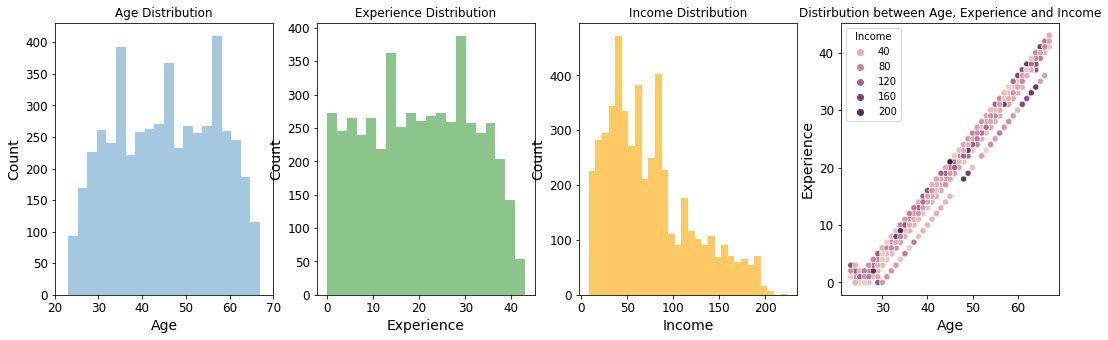

In [9]:
plt.figure(figsize=(18,5))

plt.subplot(1,4,1)
sns.distplot(df['Age'], kde=False, bins=20)
plt.title('Age Distribution')
plt.ylabel('Count')
plt.xlabel('Age')
plt.xlim(20,70)

plt.subplot(142)
df['Experience'].hist(alpha=0.45, bins=20, grid=False, color='green')
plt.title('Experience Distribution')
plt.xlabel('Experience')
plt.ylabel('Count')

plt.subplot(143)
fig = df['Income'].hist(alpha=0.6, bins=30, grid=False, color='orange')
fig.set_title('Income Distribution')
fig.set_xlabel('Income')
fig.set_ylabel('Count')

plt.subplot(144)
sns.scatterplot(x='Age', y='Experience', hue='Income', data=df, color='purple')
plt.title('Distirbution between Age, Experience and Income')
plt.show()

**Summary**
<div style="float:left;margin-left:20px; max-width:100%; text-align:justify;
          padding:15px;
          background-color:#E5E4E2;
          margin:0;
          border-radius: 13px 13px;
          overflow:hidden;">

<p> 📌 Age Distribution: Distribution of customers are quite evenly across Age range, although there are spikes around 35, 45, 65 years-old <br>

<p> 📌 Experience Distribution: Experience is also distributed evenly across Experience with spikes around 15, 30 years <br>    
    
<p> 📌 Income Distribution: Majority of customers has Income range less than 90  <br>
    
<p> 📌 Relationship between Age, Experience, Income: As expected, Experience has very high positive correlation with Age, but it seems there is no relationship between Income and Age, Experience as high Income appears across Age range and Experience range <br>    
</div>

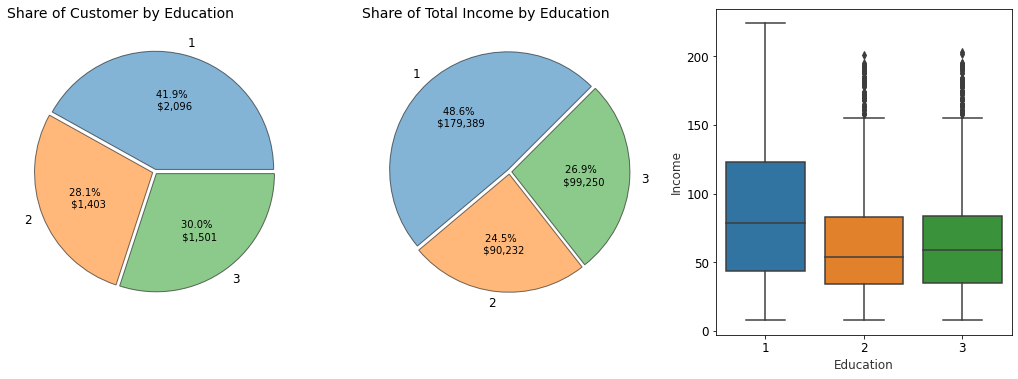

In [10]:
education_distribution = df.groupby(['Education']).agg({'Class':'count',
                                                      'Income': 'sum',
                                                      'Age': 'mean'}).reset_index()
education_distribution.columns = ['Education','Cnt_Customer','Sum_Income','Mean_Age']
education_colors = ["tab:blue" if label==1 else "tab:orange" if label==2 else "tab:green" for label in education_distribution.Education]
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(18, 6), ncols=3)

#Making a pie chart of sales per category.
ax1.pie(education_distribution["Cnt_Customer"], labels=education_distribution.Education,
      autopct=lambda p:f"{p:.1f}% \n ${p*np.sum(education_distribution['Cnt_Customer'])/100 :,.0f}",
      wedgeprops={"linewidth": 1, "edgecolor":"black", "alpha":0.55},
      colors=education_colors, explode=[0.02, 0.02, 0.02])
ax1.set_title("Share of Customer by Education", loc="left", fontdict={"fontsize":14})

#Making a pie chart of profit per category.
ax2.pie(education_distribution["Sum_Income"], labels=education_distribution.Education,
       autopct=lambda p: f"{p:.1f}% \n ${p*np.sum(education_distribution['Sum_Income'])/100 :,.0f}",
        startangle=45, wedgeprops={"linewidth": 1, "edgecolor":"black", "alpha":0.55},
        colors=education_colors, explode=[0.02, 0.02, 0.02])
ax2.set_title("Share of Total Income by Education",loc="left", fontdict={"fontsize":14})

sns.boxplot(x="Education", y="Income", data=df, ax=ax3,  palette=education_colors)
ax3.set_xlabel("Education",size = 12,alpha=0.8)
ax3.set_ylabel("Income",size = 12,alpha=0.8)

plt.show()

**Summary**
<div style="float:left;margin-left:20px; max-width:100%; text-align:justify;
          padding:15px;
          background-color:#E5E4E2;
          margin:0;
          border-radius: 13px 13px;
          overflow:hidden;">

<p> 📌 Majority of customers have Education level of 1 with around 42%, this group also has highest distribution of Total Income which contains 50% of the whole data and highest Income distribution

</div>

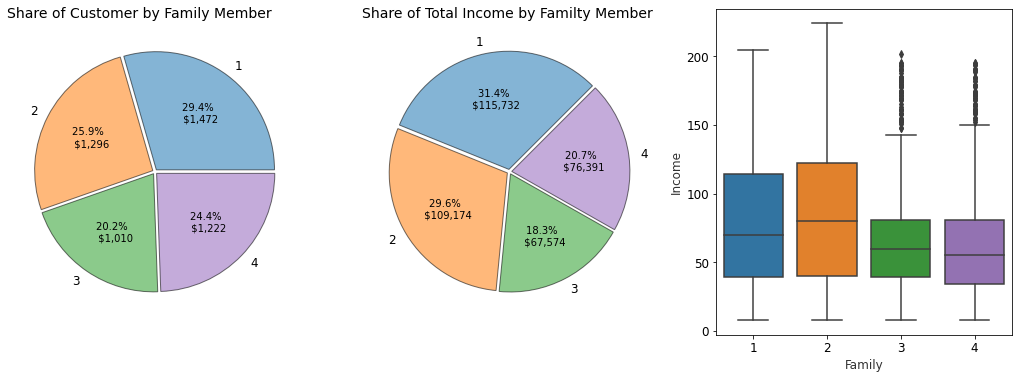

In [11]:
family_distribution = df.groupby(['Family']).agg({'Class':'count',
                                                      'Income': 'sum',
                                                      'Age': 'mean'}).reset_index()
family_distribution.columns = ['Family','Cnt_Customer','Sum_Income','Mean_Age']
family_colors = ["tab:blue" if label==1 else "tab:orange" if label==2 else "tab:green" if label==3 else "tab:purple" for label in family_distribution.Family]
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(18, 6), ncols=3)

#Making a pie chart of sales per category.
ax1.pie(family_distribution["Cnt_Customer"], labels=family_distribution.Family,
      autopct=lambda p:f"{p:.1f}% \n ${p*np.sum(family_distribution['Cnt_Customer'])/100 :,.0f}",
      wedgeprops={"linewidth": 1, "edgecolor":"black", "alpha":0.55},
      colors=family_colors, explode=[0.02, 0.02, 0.02, 0.02])
ax1.set_title("Share of Customer by Family Member", loc="left", fontdict={"fontsize":14})

#Making a pie chart of profit per category.
ax2.pie(family_distribution["Sum_Income"], labels=family_distribution.Family,
       autopct=lambda p: f"{p:.1f}% \n ${p*np.sum(family_distribution['Sum_Income'])/100 :,.0f}",
        startangle=45, wedgeprops={"linewidth": 1, "edgecolor":"black", "alpha":0.55},
        colors=family_colors, explode=[0.02, 0.02, 0.02, 0.02])
ax2.set_title("Share of Total Income by Familty Member",loc="left", fontdict={"fontsize":14})

sns.boxplot(x="Family", y="Income", data=df, ax=ax3,  palette=family_colors)
ax3.set_xlabel("Family",size = 12,alpha=0.8)
ax3.set_ylabel("Income",size = 12,alpha=0.8)

plt.show()

**Summary**
<div style="float:left;margin-left:20px; max-width:100%; text-align:justify;
          padding:15px;
          background-color:#E5E4E2;
          margin:0;
          border-radius: 13px 13px;
          overflow:hidden;">

<p> 📌 Customers have 2 family member has highest share of distribution of around 30%, the 3 remaining groups have similar share of around higher than 20%. Customer of group 2-family members also has highest average Income

</div>

### <font color=blue> 1.2. Financial Status

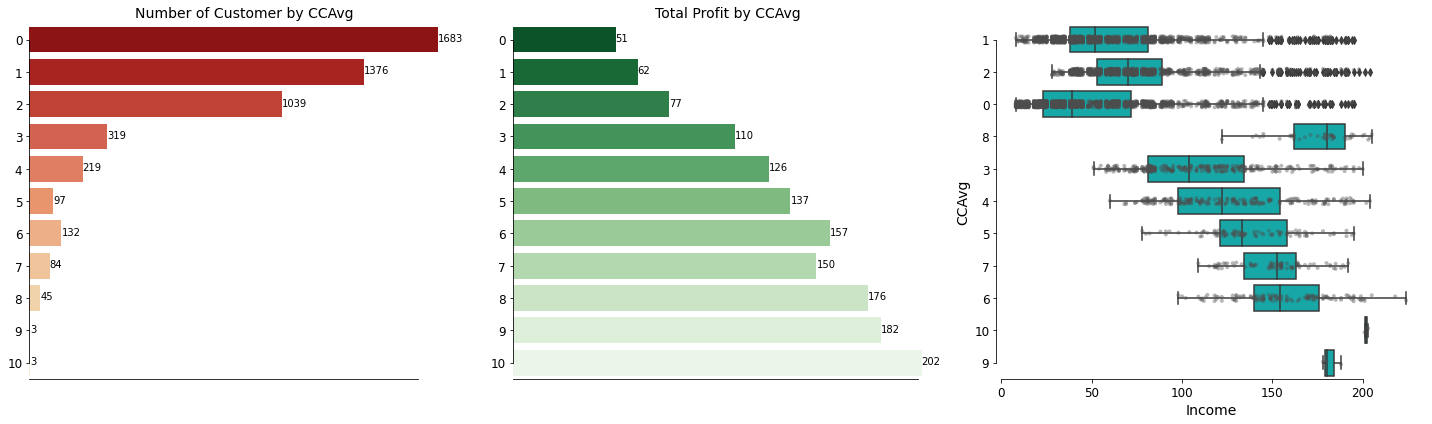

In [12]:
ccavg_distribution = df.groupby(['CCAvg']).agg({'Class':'count',
                                                  'Income': 'mean',
                                                  'Age': 'mean'}).reset_index()
ccavg_distribution.columns = ['CCAvg','Cnt_Customer','Mean_Income','Mean_Age']
ccavg_distribution['share_of_customer'] = ccavg_distribution['Cnt_Customer'] * 100/ccavg_distribution['Cnt_Customer'].sum()
ccavg_distribution.sort_values('CCAvg', ascending=True, inplace=True)
ccavg_distribution['CCAvg'] = ccavg_distribution['CCAvg'].astype(str)
df_bk = df.copy()
df_bk['CCAvg'] = df_bk['CCAvg'].astype(str)

#Plotting the states where Superstore is making a loss.
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 6), ncols=3)
sns.barplot(x=ccavg_distribution["Cnt_Customer"], y=ccavg_distribution["CCAvg"], ax=ax1, palette="OrRd_r")
sns.barplot(x=ccavg_distribution["Mean_Income"], y=ccavg_distribution["CCAvg"], ax=ax2, palette="Greens_r")
sns.boxplot(y="CCAvg", x="Income", data=df_bk, color="c", ax=ax3)
sns.stripplot(y="CCAvg", x="Income", data=df_bk, jitter=True, size=4, alpha=.4, color=".3", linewidth=0, ax=ax3)
sns.despine(trim=True)

def clean_hbar(ax):
    ax.spines["top"].set_visible(False)
    ax.set(ylabel=None, xlabel=None)
    ax.tick_params(bottom=False, labelbottom=False)   
    return ax

def annotate_hbar(ax):
    for p in ax.patches:
        _, y = p.get_xy()
        #ax.annotate(f"{p.get_width()*100 :.1f}%", xy=(p.get_width(), y+0.45))
        #ax.annotate(f"${p.get_width() / 1000 :.1f}K", xy=(p.get_width(), y+0.45))
        ax.annotate(f"{p.get_width():.0f}", xy=(p.get_width(), y+0.45))    
    return ax

#Calling the function on the two charts.
annotate_hbar(ax1)
annotate_hbar(ax2)
clean_hbar(ax1)
clean_hbar(ax2)

#Setting the title for the two charts.
ax1.set_title("Number of Customer by CCAvg", fontdict={"fontsize":14})
ax2.set_title("Total Profit by CCAvg", fontdict={"fontsize":14})
fig.tight_layout()

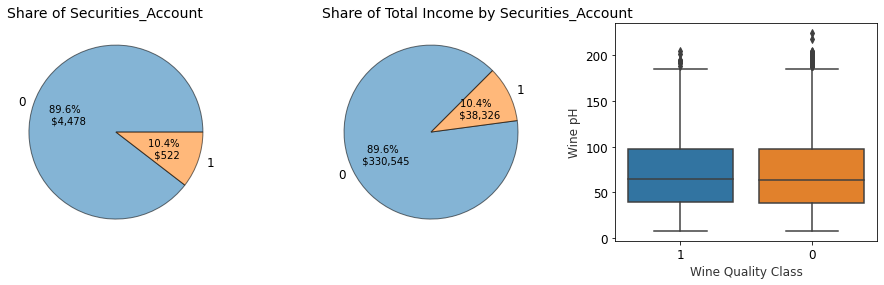

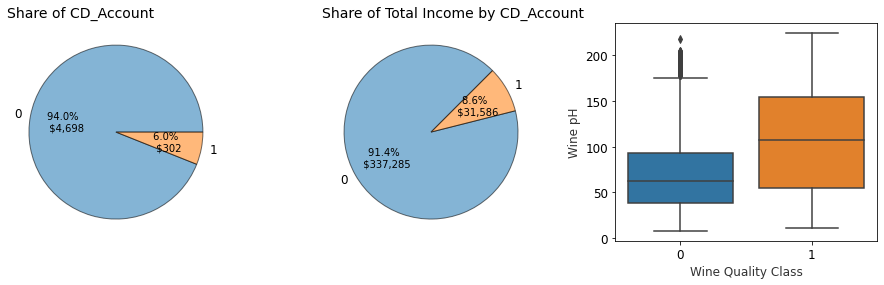

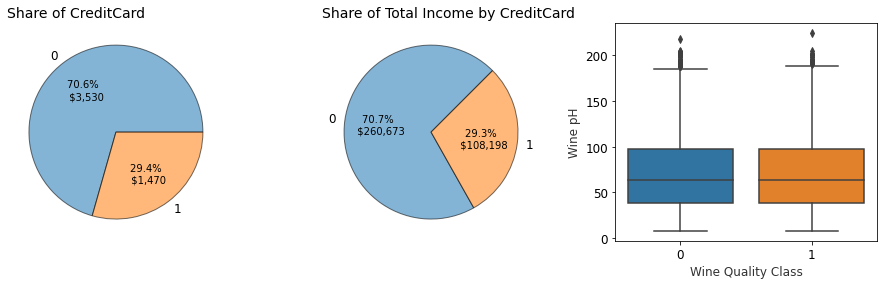

In [13]:
for col in ['Securities_Account','CD_Account','CreditCard']:
    df_bk[col] = df[col].astype(str)
    col_distribution = df_bk.groupby([col]).agg({'Class':'count',
                                               'Income': 'sum',
                                               'Age': 'mean'}).reset_index()
    col_distribution.columns = [col,'Cnt_Customer','Sum_Income','Mean_Age']
    col_distribution[col] = col_distribution[col].astype(str)
    col_colors = ["tab:blue" if label== "0" else "tab:orange" for label in col_distribution[col]]
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(16,4), ncols=3)

    #Making a pie chart of sales per category.
    ax1.pie(col_distribution["Cnt_Customer"], labels=col_distribution[col],
          autopct=lambda p:f"{p:.1f}% \n ${p*np.sum(col_distribution['Cnt_Customer'])/100 :,.0f}",
          wedgeprops={"linewidth": 1, "edgecolor":"black", "alpha":0.55},
          colors=col_colors)
    ax1.set_title("Share of " + col, loc="left", fontdict={"fontsize":14})

    #Making a pie chart of profit per category.
    ax2.pie(col_distribution["Sum_Income"], labels=col_distribution[col],
           autopct=lambda p: f"{p:.1f}% \n ${p*np.sum(col_distribution['Sum_Income'])/100 :,.0f}",
            startangle=45, wedgeprops={"linewidth": 1, "edgecolor":"black", "alpha":0.55},
            colors=col_colors)
    ax2.set_title("Share of Total Income by " + col,loc="left", fontdict={"fontsize":14})

    sns.boxplot(x=col, y="Income", data=df_bk, ax=ax3,  palette=col_colors)
    ax3.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
    ax3.set_ylabel("Wine pH",size = 12,alpha=0.8)

    plt.show()

### <font color=blue> 1.3. Combine

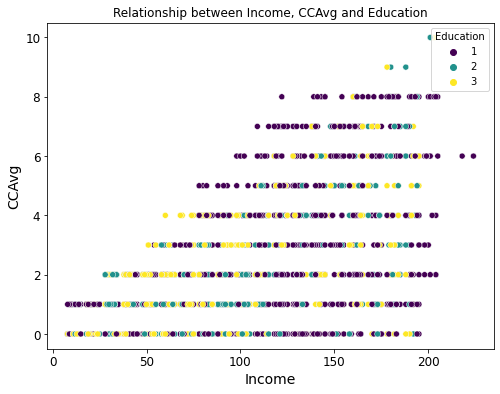

In [14]:
# Visualize the clusters using Sales and Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='CCAvg', hue='Education', data=df, palette='viridis', legend='full')

plt.title('Relationship between Income, CCAvg and Education')
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend(title='Education', loc='upper right')
plt.show()

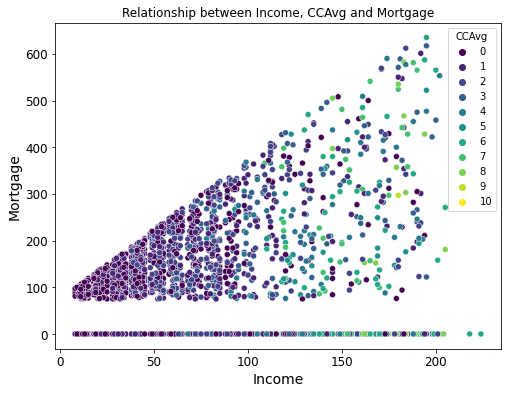

In [15]:
df['CCAvg'] = df['CCAvg'].astype(int)
df['Mortgage'] = df['Mortgage'].astype(float)
# Visualize the clusters using Sales and Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Mortgage', hue='CCAvg', data=df, palette='viridis', legend='full')

plt.title('Relationship between Income, CCAvg and Mortgage')
plt.xlabel('Income')
plt.ylabel('Mortgage')
plt.legend(title='CCAvg', loc='upper right')
plt.show()

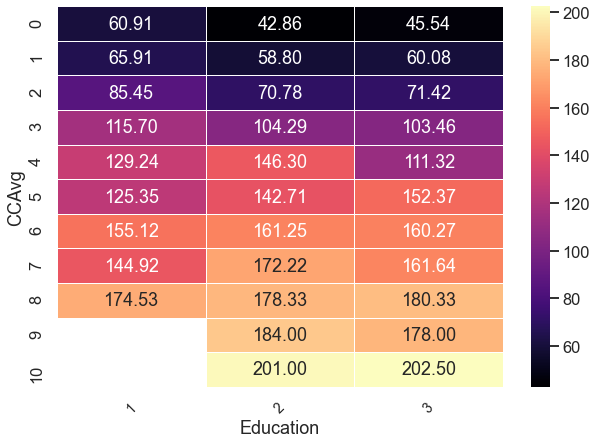

In [16]:
ccavg_education = df.pivot_table(columns='Education', index='CCAvg', values='Income', aggfunc='mean')
sns.set_style('white')
sns.set_context('talk')
plt.figure(figsize=(10,7))
sns.heatmap(ccavg_education,cmap='magma',linecolor='white',linewidths=1, annot=True,fmt='.2f')
plt.xticks(rotation=45, fontsize=14);

## <font color=red>5.2. Examine missing values

In [17]:
miss_val_df = pd.DataFrame(df.isnull().sum(), columns=['count'])
miss_val_df['Percentage'] = 100 * df.isnull().sum()/len(df)
miss_val_df[miss_val_df['count']>0].sort_values('Percentage', ascending=False)

,count,Percentage


## <font color=red>5.3. Examine Target variable

In [18]:
df['Class'].value_counts()

0    4520
1     480
Name: Class, dtype: int64

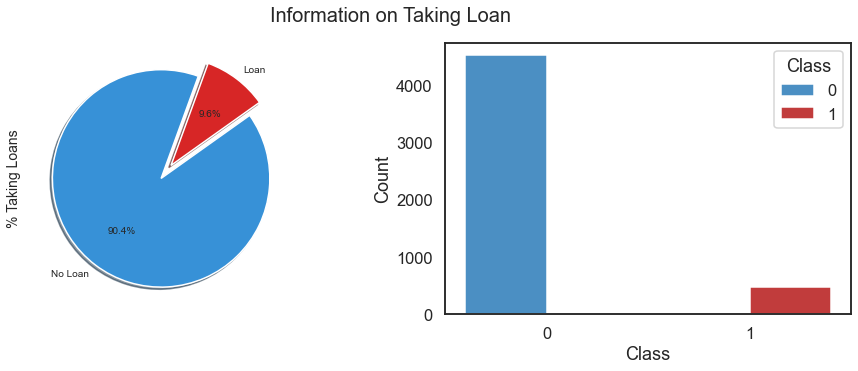

In [19]:
f, ax = plt.subplots(1,2,figsize=(16,5))
colors = ['#3791D7', '#D72626']
#colors = ['blue', 'red']
labels = ['No Loan', 'Loan']
plt.suptitle("Information on Taking Loan", fontsize=20)
df['Class'].value_counts().plot.pie(explode=[0,0.15], autopct='%1.1f%%', ax=ax[0], shadow=True,
                                         colors=colors, labels=labels, fontsize=10,  startangle=70)
ax[0].set_ylabel('% Taking Loans', fontsize=14)
sns.countplot(x='Class',data=df, palette=colors, hue='Class')
ax[1].set(ylabel="Count")
plt.show()

**Summary**
<div style="float:left;margin-left:20px; max-width:100%; text-align:justify;
          padding:15px;
          background-color:#E5E4E2;
          margin:0;
          border-radius: 13px 13px;
          overflow:hidden;">
<p> 
📌 In total, 9.6% of customers taking loan. 
    
📌 This is an unbalanced or imbalanced problem in classification models. That means we can expect to probably do very well in terms of accuracy but our precision and recall are going to be the true metrics that we'll have to evaluate our model. We should expect to perform that well on those metrics due to the fact that we have an imbalanced dataset here.

</div>

## <font color=red>5.4. Univariate Analysis

### <font color=blue>1. Categorize fields by data type

In [20]:
selected_vars = df.columns
selected_vars

Index(['Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Class', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard'], dtype='object')

In [21]:
## target
target = ['Class']
print("\nTarget var: ", target)

## text vars
text_vars = []
print("\nText vars: ", text_vars)
print('There are {} Text variables'.format(len(text_vars)))

# date time vars
datetime_vars = []
# datetime_vars = [var for var in df.columns if df[var].dtypes == '<M8[ns]']
print("\nDateTime vars: ", datetime_vars)
print('There are {} DateTime variables'.format(len(datetime_vars)))

## cat vars
cat_vars = [var for var in selected_vars if df[var].dtypes == 'O' if var not in target + text_vars + datetime_vars]
print("\nCategorical vars: ", cat_vars)
print('There are {} categorical variables'.format(len(cat_vars)))

num_vars = [var for var in selected_vars if df[var].dtypes != 'O' if var not in target]
print("\nNumerical vars: ", num_vars)
print('There are {} numerical variables'.format(len(num_vars)))

dis_vars = [var for var in num_vars if len(df[var].unique()) < 20]
print("\nDiscrete vars: ", dis_vars)
print('There are {} numerical variables'.format(len(dis_vars)))

cont_vars = [var for var in num_vars if var not in dis_vars]
print("\nContinous vars: ", cont_vars)
print('There are {} numerical variables'.format(len(cont_vars)))


Target var:  ['Class']

Text vars:  []
There are 0 Text variables

DateTime vars:  []
There are 0 DateTime variables

Categorical vars:  ['ZIP_Code']
There are 1 categorical variables

Numerical vars:  ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
There are 11 numerical variables

Discrete vars:  ['Family', 'CCAvg', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
There are 7 numerical variables

Continous vars:  ['Age', 'Experience', 'Income', 'Mortgage']
There are 4 numerical variables


### <font color=blue>2. Examine Discrete vars

#### <font color=brown> Show discreate vars

In [22]:
df[dis_vars].head()

,Family,CCAvg,Education,Securities_Account,CD_Account,Online,CreditCard
0,4,1,1,1,0,0,0
1,3,1,1,1,0,0,0
2,1,1,1,0,0,0,0
3,1,2,2,0,0,0,0
4,4,1,2,0,0,0,1


#### <font color=brown>  Family

<Axes: title={'center': 'Loan ratio by Family'}, xlabel='Family', ylabel='Ratio'>

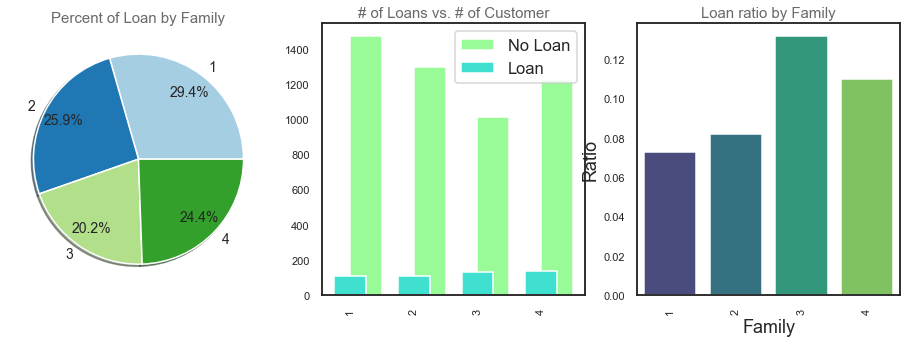

In [23]:
family_df = df.groupby(['Family']).agg({'Income':'count','Class':'sum'}).reset_index()
family_df.columns = ['Family','NbrCust', 'NbrLoan']
family_df['Ratio'] = family_df['NbrLoan']/family_df['NbrCust']

plt.figure(figsize=(16,5))
sns.despine()

plt.subplot(1,3,1)
plt.pie(family_df['NbrCust'], labels=family_df['Family'], textprops={'fontsize':14, 'fontweight':'medium'}, autopct='%1.1f%%', pctdistance=0.8, shadow=True, colors=sns.color_palette('Paired'))
plt.title("Percent of Loan by Family", fontsize=15, color='dimgrey')

plt.subplot(1,3,2)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.title('# of Loans vs. # of Customer', fontsize=15, color='dimgrey')
plt.bar(family_df['Family'], family_df['NbrCust'], width=0.5, align='edge', color='palegreen', label='No Loan')
plt.bar(family_df['Family'], family_df['NbrLoan'], width=0.5, color='turquoise', label='Loan')
plt.legend()

plt.subplot(1,3,3)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.title('Loan ratio by Family', fontsize=15, color='dimgrey')
sns.barplot(x=family_df['Family'], y=family_df.Ratio, palette='viridis')

<div style="float:left;margin-left:20px; max-width:100%; text-align:justify;
          padding:15px;
          background-color:#E5E4E2;
          margin:0;
          border-radius: 13px 13px;
          overflow:hidden;">
<p> 
Customers with higher number of members (3, 4) have higher ratio of taking personal loan. This can be explained that they have higher demand of spending. If there are more detail data such as transactional data, we can investigate spending pattern to understand further which type of spending that customer are likely to take personal loan
</div>

#### <font color=brown>  Securities_Account

<Axes: title={'center': 'Loan ratio by Securities_Account'}, xlabel='Securities_Account', ylabel='Ratio'>

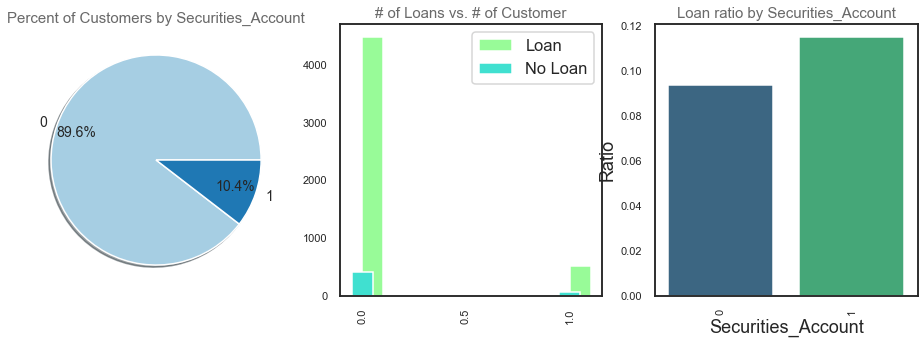

In [24]:
security_df = df.groupby(['Securities_Account']).agg({'Age':'count','Class':'sum'}).reset_index()
security_df.columns = ['Securities_Account','NbrCust', 'NbrLoan']
security_df['Ratio'] = security_df['NbrLoan']/security_df['NbrCust']

plt.figure(figsize=(16,5))
sns.despine()
plt.subplot(1,3,1)
plt.pie(security_df['NbrCust'], labels=security_df['Securities_Account'], textprops={'fontsize':14, 'fontweight':'medium'}, autopct='%1.1f%%', pctdistance=0.8, shadow=True, colors=sns.color_palette('Paired'))
plt.title("Percent of Customers by Securities_Account", fontsize=15, color='dimgrey')

plt.subplot(1,3,2)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.title('# of Loans vs. # of Customer', fontsize=15, color='dimgrey')
plt.bar(security_df['Securities_Account'], security_df['NbrCust'], width=0.1, align='edge', color='palegreen', label='Loan')
plt.bar(security_df['Securities_Account'], security_df['NbrLoan'], width=0.1, color='turquoise', label='No Loan')
plt.legend()

plt.subplot(1,3,3)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.title('Loan ratio by Securities_Account', fontsize=15, color='dimgrey')
sns.barplot(x=security_df['Securities_Account'], y=security_df.Ratio, palette='viridis')



<div style="float:left;margin-left:20px; max-width:100%; text-align:justify;
          padding:15px;
          background-color:#E5E4E2;
          margin:0;
          border-radius: 13px 13px;
          overflow:hidden;">
<p> 
Customers with Security account have higher ratio of taking personal loan although the different are quite small which suggests that this may no be an important feature in predictive models
</div>

#### <font color=brown>  CD_Account

<Axes: title={'center': 'Loan ratio by CD_Account'}, xlabel='CD_Account', ylabel='Ratio'>

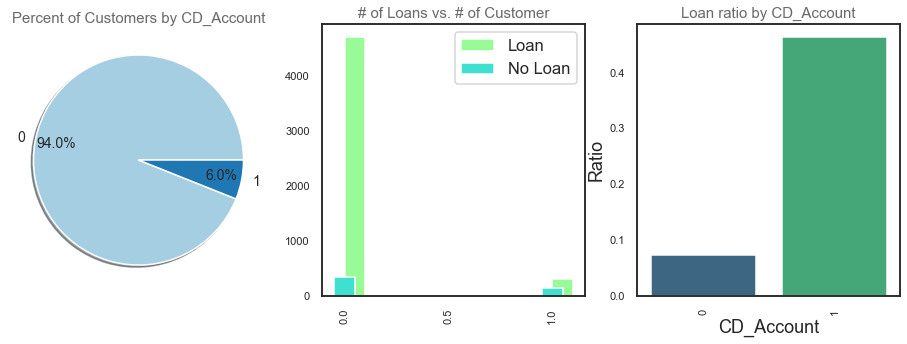

In [25]:
cd_df = df.groupby(['CD_Account']).agg({'Age':'count','Class':'sum'}).reset_index()
cd_df.columns = ['CD_Account','NbrCust', 'NbrLoan']
cd_df['Ratio'] = cd_df['NbrLoan']/cd_df['NbrCust']

plt.figure(figsize=(16,5))
sns.despine()

plt.subplot(1,3,1)
plt.pie(cd_df['NbrCust'], labels=cd_df['CD_Account'], textprops={'fontsize':14, 'fontweight':'medium'}, autopct='%1.1f%%', pctdistance=0.8, shadow=True, colors=sns.color_palette('Paired'))
plt.title("Percent of Customers by CD_Account", fontsize=15, color='dimgrey')

plt.subplot(1,3,2)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.title('# of Loans vs. # of Customer', fontsize=15, color='dimgrey')
plt.bar(cd_df['CD_Account'], cd_df['NbrCust'], width=0.1, align='edge', color='palegreen', label='Loan')
plt.bar(cd_df['CD_Account'], cd_df['NbrLoan'], width=0.1, color='turquoise', label='No Loan')
plt.legend()

plt.subplot(1,3,3)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.title('Loan ratio by CD_Account', fontsize=15, color='dimgrey')
sns.barplot(x=cd_df['CD_Account'], y=cd_df.Ratio, palette='viridis')

<div style="float:left;margin-left:20px; max-width:100%; text-align:justify;
          padding:15px;
          background-color:#E5E4E2;
          margin:0;
          border-radius: 13px 13px;
          overflow:hidden;">
<p> 
Customers with CD_Account have much higher ratio of taking personal loan (0.46 compared to 0.09), however the number of customers having CD_Account is quite small (only 6%). This indicates that this may be an important feature in predictive models
</div>

#### <font color=brown>  CreditCard

<Axes: title={'center': 'Loan ratio by CreditCard'}, xlabel='CreditCard', ylabel='Ratio'>

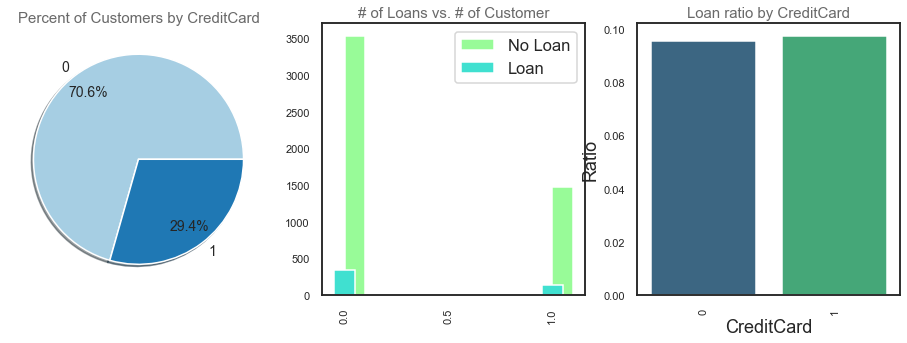

In [26]:
cc_df = df.groupby(['CreditCard']).agg({'Age':'count','Class':'sum'}).reset_index()
cc_df.columns = ['CreditCard','NbrCust', 'NbrLoan']
cc_df['Ratio'] = cc_df['NbrLoan']/cc_df['NbrCust']

plt.figure(figsize=(16,5))
sns.despine()

plt.subplot(1,3,1)
plt.pie(cc_df['NbrCust'], labels=cc_df['CreditCard'], textprops={'fontsize':14, 'fontweight':'medium'}, autopct='%1.1f%%', pctdistance=0.8, shadow=True, colors=sns.color_palette('Paired'))
plt.title("Percent of Customers by CreditCard", fontsize=15, color='dimgrey')

plt.subplot(1,3,2)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.title('# of Loans vs. # of Customer', fontsize=15, color='dimgrey')
plt.bar(cc_df['CreditCard'], cc_df['NbrCust'], width=0.1, align='edge', color='palegreen', label='No Loan')
plt.bar(cc_df['CreditCard'], cc_df['NbrLoan'], width=0.1, color='turquoise', label='Loan')
plt.legend()

plt.subplot(1,3,3)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.title('Loan ratio by CreditCard', fontsize=15, color='dimgrey')
sns.barplot(x=cc_df['CreditCard'], y=cc_df.Ratio, palette='viridis')

<div style="float:left;margin-left:20px; max-width:100%; text-align:justify;
          padding:15px;
          background-color:#E5E4E2;
          margin:0;
          border-radius: 13px 13px;
          overflow:hidden;">
<p> 
Customers with CreditCard have much higher ratio of taking personal loan (0.46 compared to 0.09), besides the number of customers having CD_Account is quite large (29.4%). This indicates that this may be an very important feature in predictive models
</div>

#### <font color=brown>   Online

<Axes: title={'center': 'Loan ratio by Online'}, xlabel='Online', ylabel='Ratio'>

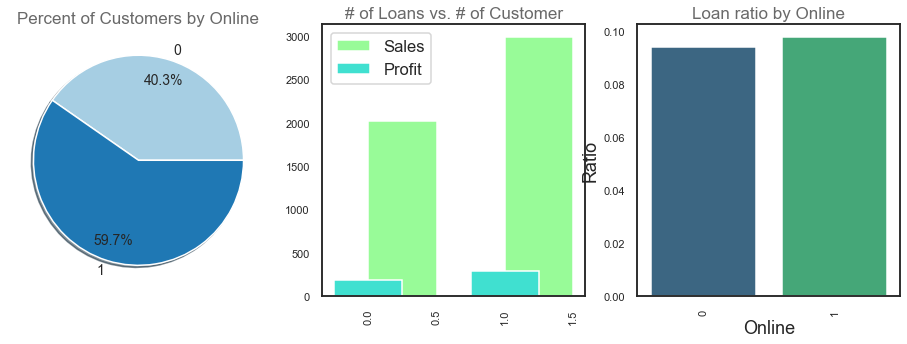

In [27]:
online_df = df.groupby(['Online']).agg({'Age':'count','Class':'sum'}).reset_index()
online_df.columns = ['Online','NbrCust', 'NbrLoan']
online_df['Ratio'] = online_df['NbrLoan']/online_df['NbrCust']

plt.figure(figsize=(16,5))
sns.despine()

plt.subplot(1,3,1)
plt.pie(online_df['NbrCust'], labels=online_df['Online'], textprops={'fontsize':14, 'fontweight':'medium'}, autopct='%1.1f%%', pctdistance=0.8, shadow=True, colors=sns.color_palette('Paired'))
plt.title("Percent of Customers by Online", fontsize=17, color='dimgrey')

plt.subplot(1,3,2)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.title('# of Loans vs. # of Customer', fontsize=17, color='dimgrey')
plt.bar(online_df['Online'], online_df['NbrCust'], width=0.5, align='edge', color='palegreen', label='Sales')
plt.bar(online_df['Online'], online_df['NbrLoan'], width=0.5, color='turquoise', label='Profit')
plt.legend()

plt.subplot(1,3,3)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.title('Loan ratio by Online', fontsize=17, color='dimgrey')
sns.barplot(x=online_df['Online'], y=online_df.Ratio, palette='viridis')

<div style="float:left;margin-left:20px; max-width:100%; text-align:justify;
          padding:15px;
          background-color:#E5E4E2;
          margin:0;
          border-radius: 13px 13px;
          overflow:hidden;">
<p> 
Customers with CreditCard have much higher ratio of taking personal loan (0.46 compared to 0.09), besides the number of customers having CD_Account is quite large (29.4%). This indicates that this may be an very important feature in predictive models
</div>

#### <font color=brown>   Education

<Axes: title={'center': 'Loan ratio by Online'}, xlabel='Education', ylabel='Ratio'>

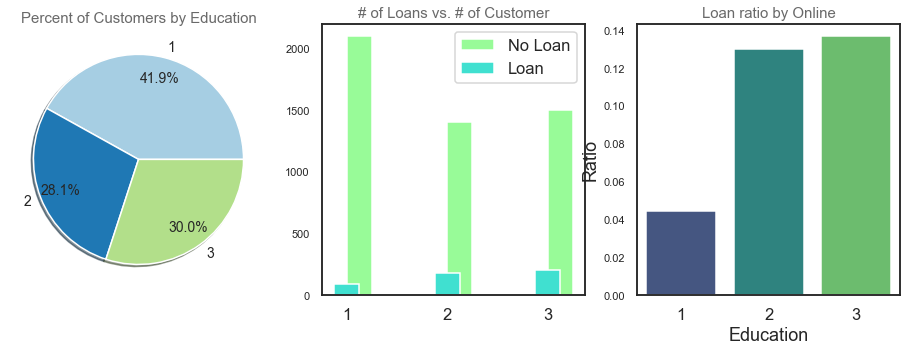

In [28]:
education_df = df.groupby(['Education']).agg({'Age':'count','Class':'sum'}).reset_index()
education_df.columns = ['Education','NbrCust', 'NbrLoan']
education_df['Ratio'] = education_df['NbrLoan']/education_df['NbrCust']

plt.figure(figsize=(16,5))
sns.despine()
plt.subplot(1,3,1)
plt.pie(education_df['NbrCust'], labels=education_df['Education'], textprops={'fontsize':14, 'fontweight':'medium'}, autopct='%1.1f%%', pctdistance=0.8, shadow=True, colors=sns.color_palette('Paired'))
plt.title("Percent of Customers by Education", fontsize=15, color='dimgrey')

plt.subplot(1,3,2)
plt.yticks(fontsize=11)
plt.title('# of Loans vs. # of Customer', fontsize=15, color='dimgrey')
plt.bar(education_df['Education'], education_df['NbrCust'], width=0.25, align='edge', color='palegreen', label='No Loan')
plt.bar(education_df['Education'], education_df['NbrLoan'], width=0.25, color='turquoise', label='Loan')
plt.legend()

plt.subplot(1,3,3)
plt.yticks(fontsize=11)
plt.title('Loan ratio by Online', fontsize=15, color='dimgrey')
sns.barplot(x=education_df['Education'], y=education_df.Ratio, palette='viridis')

<div style="float:left;margin-left:20px; max-width:100%; text-align:justify;
          padding:15px;
          background-color:#E5E4E2;
          margin:0;
          border-radius: 13px 13px;
          overflow:hidden;">
<p> 
The left figure shows that the majority of customers have level of education is 1 (42%), following by 3 (30%), and 2 (28.1%) while the right figure means customers with higher education are likely to take more loan than lower eduction. This may be an important feature    
    
</div>

#### <font color=brown>   CCAvg

<Axes: title={'center': 'Loan ratio by CCAvg'}, xlabel='CCAvg', ylabel='Ratio'>

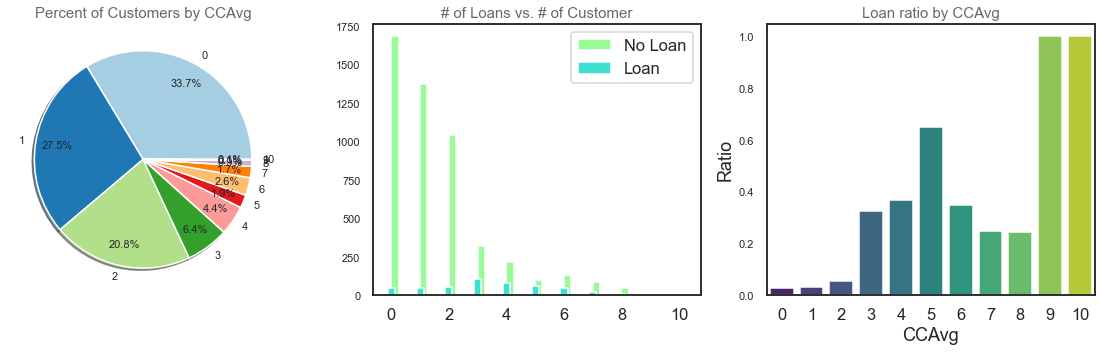

In [29]:
ccavg_df = df.groupby(['CCAvg']).agg({'Age':'count','Class':'sum'}).reset_index()
ccavg_df.columns = ['CCAvg','NbrCust', 'NbrLoan']
ccavg_df['Ratio'] = ccavg_df['NbrLoan']/ccavg_df['NbrCust']

plt.figure(figsize=(20,5))
sns.despine()
plt.subplot(1,3,1)
plt.pie(ccavg_df['NbrCust'], labels=ccavg_df['CCAvg'], textprops={'fontsize':11, 'fontweight':'medium'}, autopct='%1.1f%%', pctdistance=0.8, shadow=True, colors=sns.color_palette('Paired'))
plt.title("Percent of Customers by CCAvg", fontsize=15, color='dimgrey')

plt.subplot(1,3,2)
plt.yticks(fontsize=11)
plt.title('# of Loans vs. # of Customer', fontsize=15, color='dimgrey')
plt.bar(ccavg_df['CCAvg'], ccavg_df['NbrCust'], width=0.25, align='edge', color='palegreen', label='No Loan')
plt.bar(ccavg_df['CCAvg'], ccavg_df['NbrLoan'], width=0.25, color='turquoise', label='Loan')
plt.legend()

plt.subplot(1,3,3)
plt.yticks(fontsize=11)
plt.title('Loan ratio by CCAvg', fontsize=15, color='dimgrey')
sns.barplot(x=ccavg_df['CCAvg'], y=ccavg_df.Ratio, palette='viridis')

<div style="float:left;margin-left:20px; max-width:100%; text-align:justify;
          padding:15px;
          background-color:#E5E4E2;
          margin:0;
          border-radius: 13px 13px;
          overflow:hidden;">
<p> 
Most of the customers having from 0 to 2 CCAvg (total 82%), however, the customers having high number of CCAvg have much higher ratio of taking loan. This field can be transformed to a flag showing customer with low CCAvg (0-2) and customer with high CCAV (>=3) to indicate the pattern clearer
    
</div>

In [30]:
df['CCAvg_Flag'] = np.where(df['CCAvg'] <3, 0, 1)
df['CCAvg_Flag'].value_counts()

0    4098
1     902
Name: CCAvg_Flag, dtype: int64

<Axes: title={'center': 'Loan ratio by CCAvg_Flag'}, xlabel='CCAvg_Flag', ylabel='Ratio'>

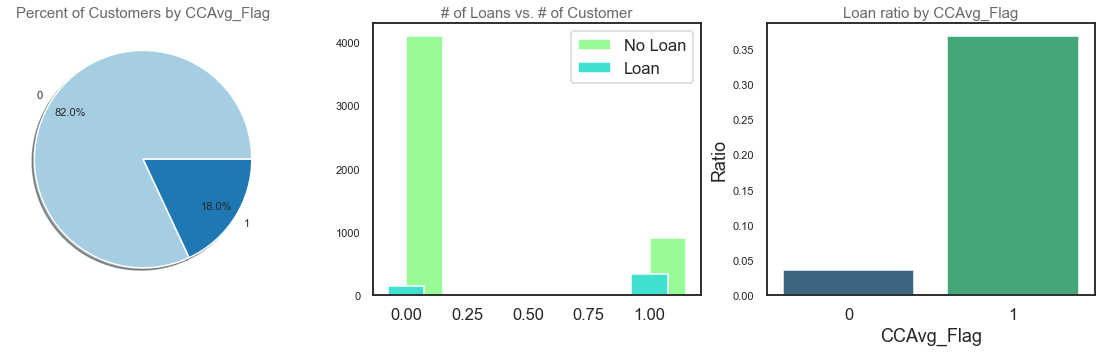

In [31]:
ccavg_df = df.groupby(['CCAvg_Flag']).agg({'Age':'count','Class':'sum'}).reset_index()
ccavg_df.columns = ['CCAvg_Flag','NbrCust', 'NbrLoan']
ccavg_df['Ratio'] = ccavg_df['NbrLoan']/ccavg_df['NbrCust']

plt.figure(figsize=(20,5))
sns.despine()
plt.subplot(1,3,1)
plt.pie(ccavg_df['NbrCust'], labels=ccavg_df['CCAvg_Flag'], textprops={'fontsize':11, 'fontweight':'medium'}, autopct='%1.1f%%', pctdistance=0.8, shadow=True, colors=sns.color_palette('Paired'))
plt.title("Percent of Customers by CCAvg_Flag", fontsize=15, color='dimgrey')

plt.subplot(1,3,2)
plt.yticks(fontsize=11)
plt.title('# of Loans vs. # of Customer', fontsize=15, color='dimgrey')
plt.bar(ccavg_df['CCAvg_Flag'], ccavg_df['NbrCust'], width=0.15, align='edge', color='palegreen', label='No Loan')
plt.bar(ccavg_df['CCAvg_Flag'], ccavg_df['NbrLoan'], width=0.15, color='turquoise', label='Loan')
plt.legend()

plt.subplot(1,3,3)
plt.yticks(fontsize=11)
plt.title('Loan ratio by CCAvg_Flag', fontsize=15, color='dimgrey')
sns.barplot(x=ccavg_df['CCAvg_Flag'], y=ccavg_df.Ratio, palette='viridis')

### <font color=blue> 3. Examine Continuous vars

In [32]:
df[cont_vars].head()

,Age,Experience,Income,Mortgage
0,25,1,49,0.000
1,45,19,34,0.000
2,39,15,11,0.000
3,35,9,100,0.000
4,35,8,45,0.000


#### <font color=brown>  Examine distribution of each var

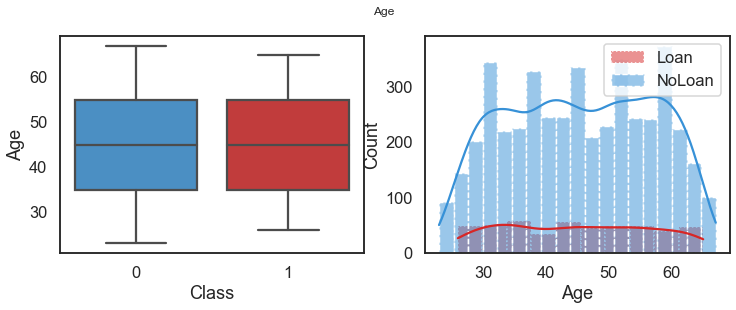

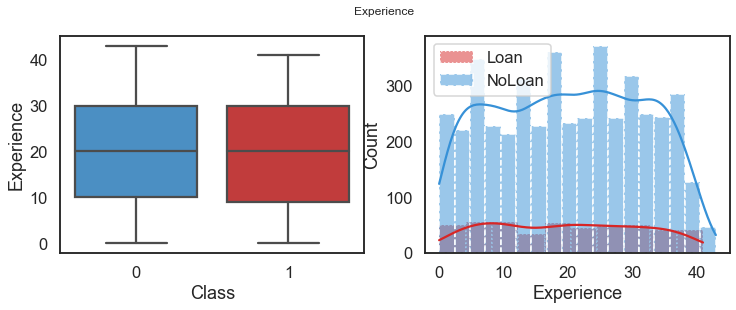

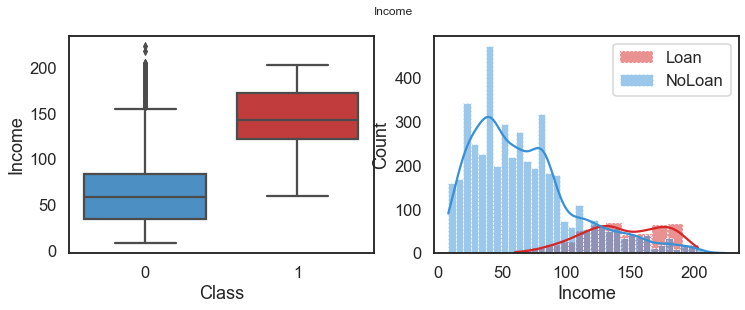

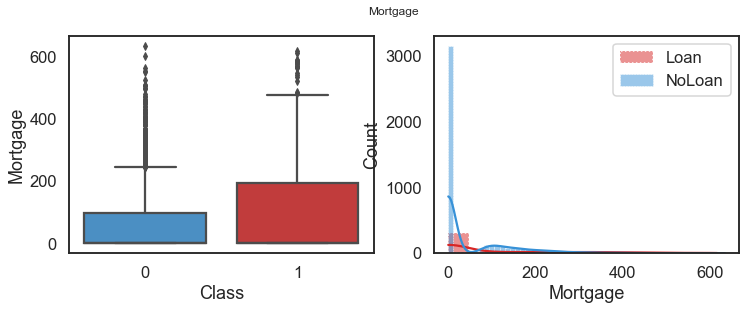

In [33]:
c1_df = df.loc[df.Class==1,:]
c0_df = df.loc[df.Class==0,:]
colors = ['#3791D7','#D72626']

for column in cont_vars:
    plt.figure(figsize=[12,4])
    plt.suptitle(column, fontsize=12)
    plt.subplot(121)
    sns.boxplot(x='Class', y=column, data=df, palette=colors)
    plt.subplot(122)
    sns.histplot(c1_df[column],  kde = True, label='Loan', color='#D72626', linestyle=":")
    sns.histplot(c0_df[column],  kde = True, label='NoLoan', color='#3791D7', linestyle="--")
    plt.legend()
    plt.show()

<div style="float:left;margin-left:20px; max-width:100%; text-align:justify;
          padding:15px;
          background-color:#E5E4E2;
          margin:0;
          border-radius: 13px 13px;
          overflow:hidden;">
<p> 
📌 It can be seen from the plot that distribution of 2 classes of **Income, Mortgage** are different, with mean of class 1 is higher than mean of class 0. This indicates these this feature may be important features to predict default observation

    
📌 Distribution of features **Age, Experience** are quite similar between the two classes

</div>

We can print descriptive statistics of each class for each feature to get more detail

In [62]:
for col in cont_vars:
    print('------------------------------------------------------------------------')
    print(col)
    print('------------------------------------------------------------------------')
    print(df.groupby(['Class'])[col].describe())

------------------------------------------------------------------------
Age
------------------------------------------------------------------------
         count   mean    std    min    25%    50%    75%    max
Class                                                          
0     4520.000 45.367 11.450 23.000 35.000 45.000 55.000 67.000
1      480.000 45.067 11.591 26.000 35.000 45.000 55.000 65.000
------------------------------------------------------------------------
Experience
------------------------------------------------------------------------
         count   mean    std   min    25%    50%    75%    max
Class                                                         
0     4520.000 20.165 11.398 0.000 10.000 20.000 30.000 43.000
1      480.000 19.844 11.582 0.000  9.000 20.000 30.000 41.000
------------------------------------------------------------------------
Income
------------------------------------------------------------------------
         count    mean    std   

### <font color=blue>4. Explore categorical variables

#### <font color=brown>  List all categorical variables 

In [34]:
df[cat_vars].head()

,ZIP_Code
0,91107
1,90089
2,94720
3,94112
4,91330


#### <font color=brown> Count unique values of each categorical variables

In [35]:
df[cat_vars].nunique().sort_values(ascending=False)

ZIP_Code    467
dtype: int64

#### <font color=brown>  Inspect unique values for each categorical vars having small number of unqiue values to see if they are appropriate or having data issues

In [36]:
# only consider categorical vars with num of unique values less than or equal to 20
selected_list = ['county_name']

def analyse_frequency_labels(df, var):
    data = df.copy()
    tmp = data[var].value_counts() / len(data)
    return tmp

for var in cat_vars:
    print(var)
    print(analyse_frequency_labels(df, var))
    print()

ZIP_Code
94720   0.034
94305   0.025
95616   0.023
90095   0.014
93106   0.011
93943   0.011
92037   0.011
91320   0.011
91711   0.010
94025   0.010
92093   0.010
90024   0.010
90245   0.010
90089   0.009
91330   0.009
92121   0.009
94304   0.009
94143   0.007
95051   0.007
94608   0.007
92182   0.006
92028   0.006
92521   0.006
95054   0.006
95814   0.006
95014   0.006
94542   0.005
94550   0.005
94301   0.005
95064   0.005
94501   0.005
95039   0.005
95819   0.005
93407   0.005
94105   0.005
91107   0.005
94022   0.005
95060   0.005
94303   0.005
93117   0.005
94596   0.005
93555   0.005
94080   0.005
95521   0.005
91380   0.004
92612   0.004
92717   0.004
92647   0.004
94110   0.004
91768   0.004
94117   0.004
94132   0.004
90034   0.004
90401   0.004
94005   0.004
90266   0.004
92122   0.004
92697   0.004
90025   0.004
95747   0.004
90840   0.004
94709   0.004
94309   0.004
92130   0.004
90291   0.004
93940   0.004
94122   0.004
93023   0.003
90630   0.003
92009   0.003
94583   0.0

=> It seems that the data is appropriate, go to check each value for making further decision in processing and engineering steps

### <font color=blue> 5. Explore Geological features

In [37]:
#pip install pgeocode
import pgeocode

# address details from zip code
Zip_List = df['ZIP_Code'].tolist()
Zip_Code = [str(i) for i in Zip_List]
# Create a Nominatim object for a specific country
nomi = pgeocode.Nominatim('us')
address= nomi.query_postal_code(Zip_Code)
address.drop(columns = ['place_name', 'community_name', 'community_code', 'accuracy'], axis = 1, inplace = True)
address.head()

,postal_code,country_code,state_name,state_code,county_name,county_code,latitude,longitude
0,91107,US,California,CA,Los Angeles,37.000,34.151,-118.089
1,90089,US,California,CA,Los Angeles,37.000,33.787,-118.299
2,94720,US,California,CA,Alameda,1.000,37.874,-122.255
3,94112,US,California,CA,City and County of San Francisco,75.000,37.719,-122.441
4,91330,US,California,CA,Los Angeles,37.000,34.228,-118.537


In [38]:
df_bk = df.copy()
df_bk = pd.concat([df_bk, address], axis=1)
print(df_bk.shape)
df_bk.head()

(5000, 22)


,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Class,Securities_Account,CD_Account,Online,CreditCard,CCAvg_Flag,postal_code,country_code,state_name,state_code,county_name,county_code,latitude,longitude
0,25,1,49,91107,4,1,1,0.000,0,1,0,0,0,0,91107,US,California,CA,Los Angeles,37.000,34.151,-118.089
1,45,19,34,90089,3,1,1,0.000,0,1,0,0,0,0,90089,US,California,CA,Los Angeles,37.000,33.787,-118.299
2,39,15,11,94720,1,1,1,0.000,0,0,0,0,0,0,94720,US,California,CA,Alameda,1.000,37.874,-122.255
3,35,9,100,94112,1,2,2,0.000,0,0,0,0,0,0,94112,US,California,CA,City and County of San Francisco,75.000,37.719,-122.441
4,35,8,45,91330,4,1,2,0.000,0,0,0,0,1,0,91330,US,California,CA,Los Angeles,37.000,34.228,-118.537


In [39]:
county_df = pd.DataFrame(df_bk['county_name'].value_counts())
county_df.columns = ['NbrCust']
county_df['NbrLoan'] = df_bk.groupby(['county_name'])['Class'].sum()
county_df['LoanRatio'] = np.round(county_df['NbrLoan']/county_df['NbrCust'],2)
county_df = county_df.reset_index()
county_df.rename(columns={'index':'county_name'},inplace=True)

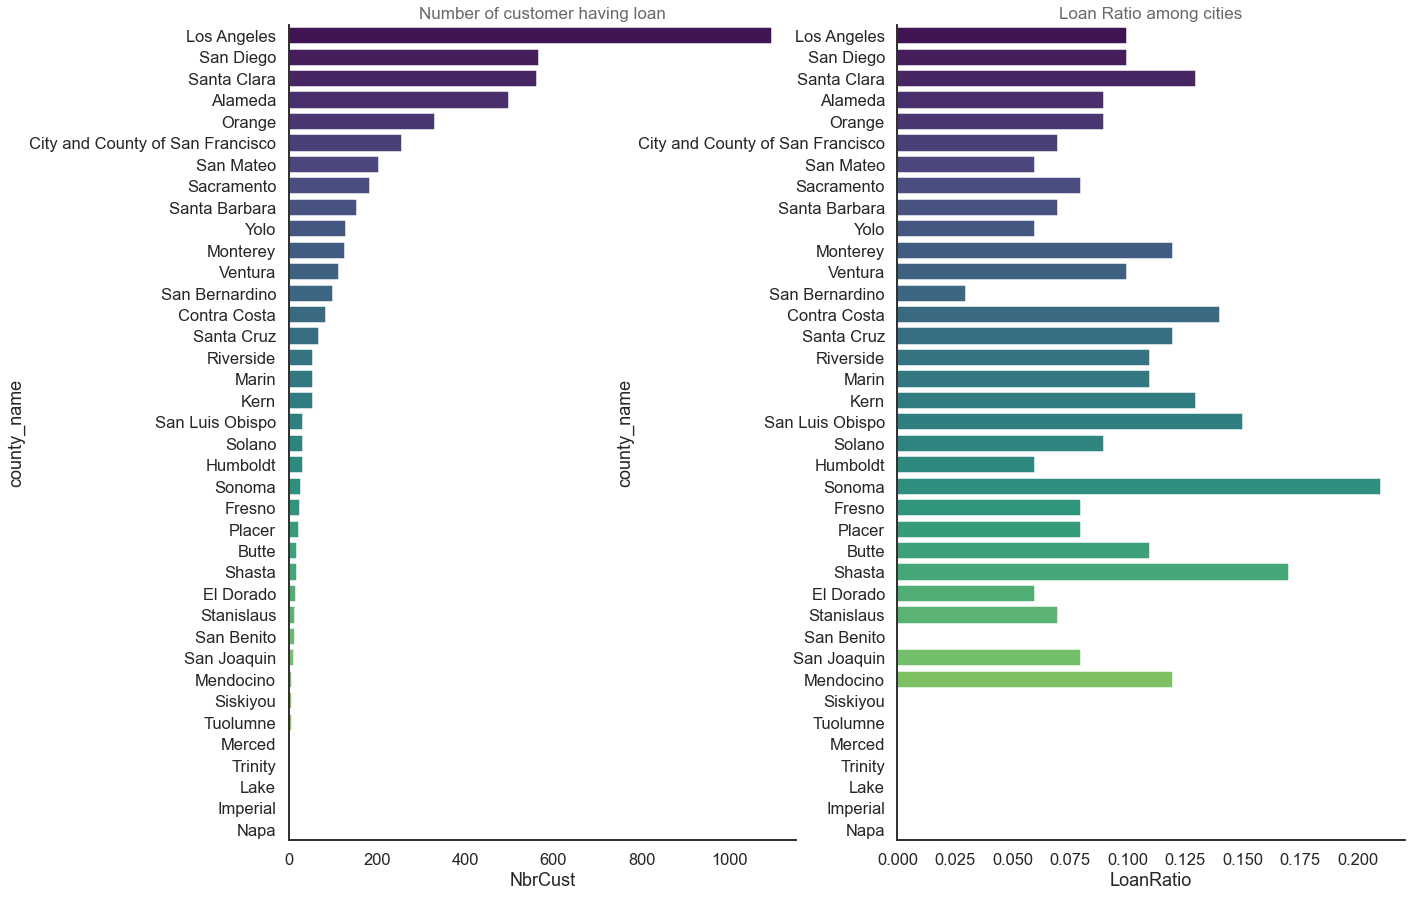

In [40]:
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
sns.barplot(y='county_name', x='NbrCust', data=county_df, palette='viridis')
plt.title("Number of customer having loan", fontsize=17, color='dimgrey')
sns.despine()
plt.subplot(1,2,2)
sns.barplot(y='county_name', x='LoanRatio', data=county_df, palette='viridis')
plt.title("Loan Ratio among cities", fontsize=17, color='dimgrey')
sns.despine()
plt.show()

**Summary**
<div style="float:left;margin-left:20px; max-width:100%; text-align:justify;
          padding:15px;
          background-color:#E5E4E2;
          margin:0;
          border-radius: 13px 13px;
          overflow:hidden;">
<p> 
📌 The left figure shows that most of the customers taking loans live in Los Angles, San Diego, Santa Clara, Alameda, Orange, San Francisco, these cities have main business taking place. The right figure shows that loan ratio is about 10% for cities with large number of customers while it is 15% for cities with less number of customers.
    
📌 The figures indicates that the distribution of loan is highly uneven, the business still have room to improve by expanding to cities that have small percent of total customers but higher low loan ratios. A further analysis should be conducted to investigate the characteristics of customers in top cities and middle, bottom cities to support making decision on expand the business 

</div>

### <font color=blue> 6. Distribution of cities, income vs loan

<Axes: xlabel='Income', ylabel='county_name'>

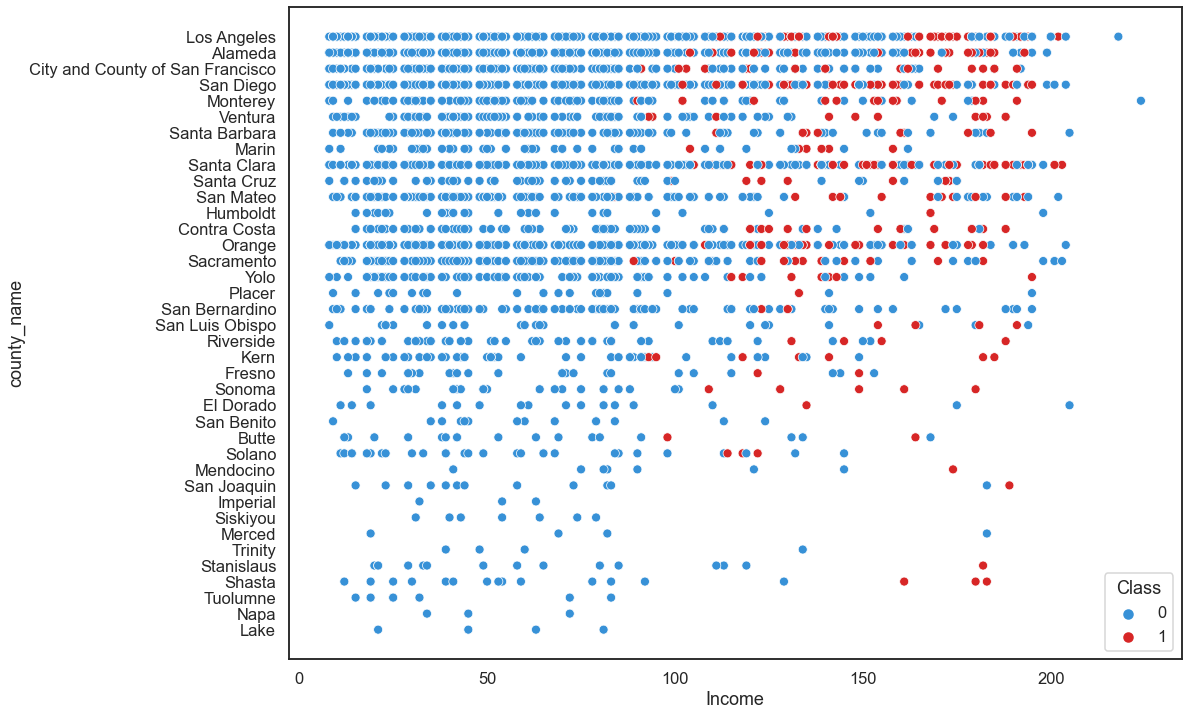

In [41]:
plt.figure(figsize=(16,12))
#palette = ['#32612D', '#B0FC38']
#palette = ['blue', 'red']
colors = ['#3791D7', '#D72626']
sns.scatterplot(data = df_bk, x = 'Income', y = 'county_name', hue = 'Class', palette = colors)

## <font color=red>6. Multivariate Analysis

### <font color=blue> 1. Scatter plot

In [42]:
colors = ['#3791D7', '#D72626']
#palette = {0: "#76FF03",1: "#33691E"}

<Figure size 504x504 with 0 Axes>

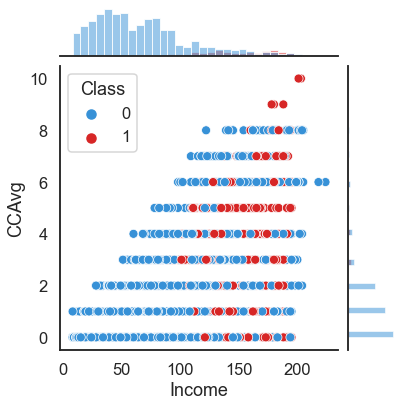

In [43]:
plt.figure(figsize=(7,7))
JG = sns.JointGrid(data = df, x = "Income", y = "CCAvg", hue = "Class", palette = colors)
JG.plot(sns.scatterplot, sns.histplot)
plt.show()

<Figure size 504x504 with 0 Axes>

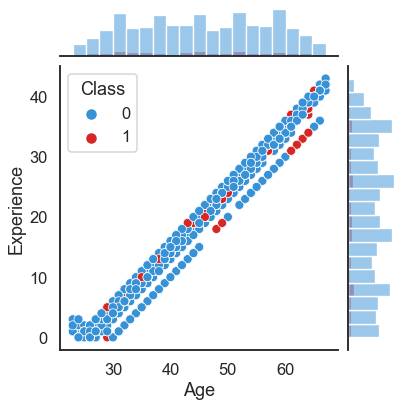

In [44]:
plt.figure(figsize=(7,7))
JG = sns.JointGrid(data = df, x = "Age", y = "Experience", hue = "Class", palette = colors)
JG.plot(sns.scatterplot, sns.histplot)
plt.show()

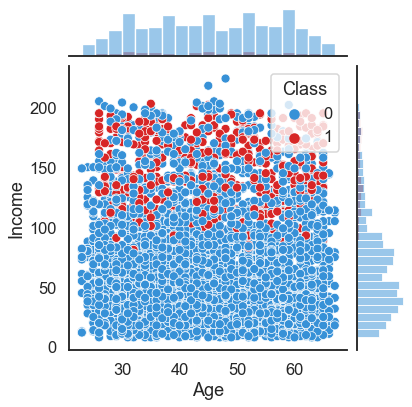

In [45]:
JG = sns.JointGrid(data = df, x = "Age", y = "Income", hue = "Class", palette = colors)
JG.plot(sns.scatterplot, sns.histplot)
plt.show()

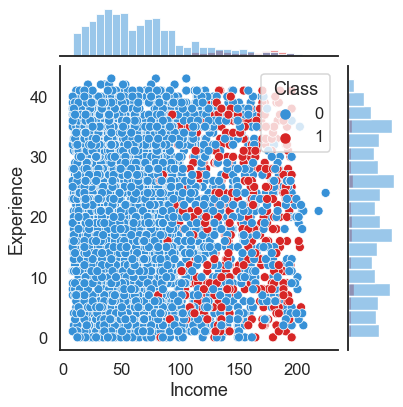

In [46]:
JG = sns.JointGrid(data = df, y = "Experience", x = "Income", hue = "Class", palette = colors)
JG.plot(sns.scatterplot, sns.histplot)
plt.show()

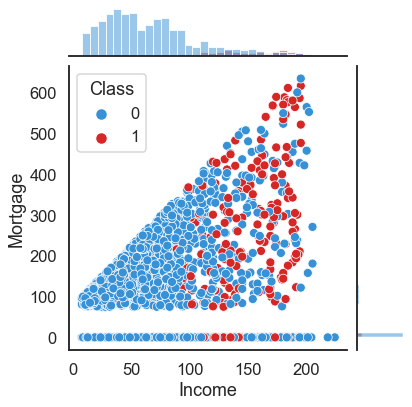

In [47]:
JG = sns.JointGrid(data = df, y = "Mortgage", x = "Income", hue = "Class", palette = colors)
JG.plot(sns.scatterplot, sns.histplot)
plt.show()

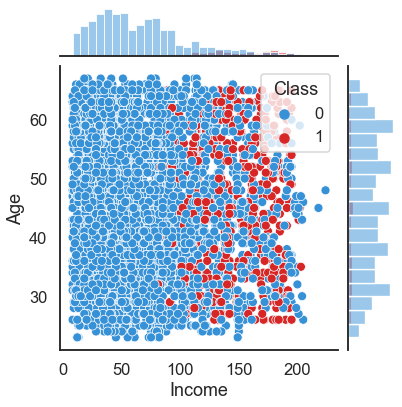

In [48]:
JG = sns.JointGrid(data = df, y = "Age", x = "Income", hue = "Class", palette = colors)
JG.plot(sns.scatterplot, sns.histplot)
plt.show()

### <font color=blue> 2. Correlation Matrix

In [49]:
corr_mat = df[selected_vars].corr()
corr_mat

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Class,Securities_Account,CD_Account,Online,CreditCard
Age,1.000,0.994,-0.055,-0.046,-0.062,0.041,-0.013,-0.008,-0.000,0.008,0.014,0.008
Experience,0.994,1.000,-0.047,-0.052,-0.061,0.014,-0.011,-0.008,-0.001,0.010,0.014,0.009
Income,-0.055,-0.047,1.000,-0.158,0.639,-0.188,0.207,0.502,-0.003,0.170,0.014,-0.002
Family,-0.046,-0.052,-0.158,1.000,-0.105,0.065,-0.020,0.061,0.020,0.014,0.010,0.012
CCAvg,-0.062,-0.061,0.639,-0.105,1.000,-0.140,0.106,0.370,0.018,0.141,-0.002,-0.006
Education,0.041,0.014,-0.188,0.065,-0.140,1.000,-0.033,0.137,-0.011,0.014,-0.015,-0.011
Mortgage,-0.013,-0.011,0.207,-0.020,0.106,-0.033,1.000,0.142,-0.005,0.089,-0.006,-0.007
Class,-0.008,-0.008,0.502,0.061,0.370,0.137,0.142,1.000,0.022,0.316,0.006,0.003
Securities_Account,-0.000,-0.001,-0.003,0.020,0.018,-0.011,-0.005,0.022,1.000,0.317,0.013,-0.015
CD_Account,0.008,0.010,0.170,0.014,0.141,0.014,0.089,0.316,0.317,1.000,0.176,0.279


<Axes: >

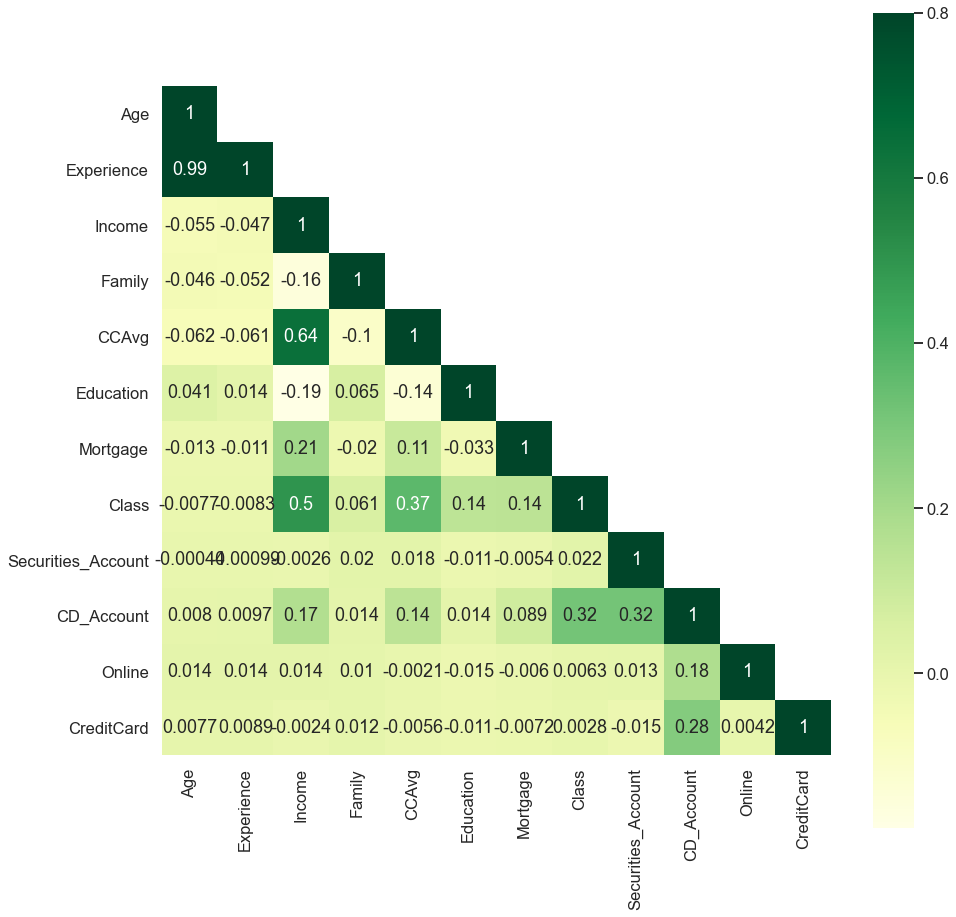

In [50]:
#corr_matt = df_train[num_vars + ['sub_grade_ratio', 'purpose_ratio', 'zip_code_ratio'] + ['Class']].corr()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize= (15, 15))
#sns.heatmap(corr_mat, mask=mask, vmax=.8, square=True, annot=True,  cmap='viridis')
sns.heatmap(corr_mat, mask=mask, vmax=.8, square=True, annot=True,  cmap='YlGn')

We can see various relationships between the features and obviously you would get a perfect correlation along the diagonal. You should have noticed almost perfect relationship between loan_amnt and installment, sub_grade_ratio vs. int_rate.  It indicates that int_rate is decided based on sub_grade info

Interest rate has essentially the highest negative correlation with whether or not someones's goting to repay their loan which kind of makes sense. Maybe if you have an extremely high interest rate you're going to find it harder to pay of that loan.

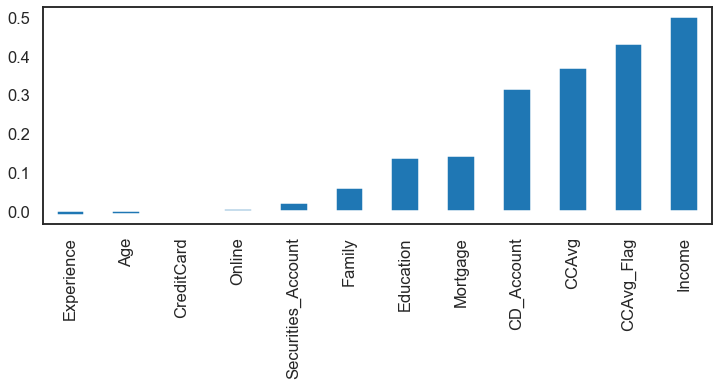

In [51]:
plt.figure(figsize = (12,4))
df.corr()['Class'].sort_values().drop('Class').plot(kind='bar')
plt.show()

## <font color=red> 7. Summary
    
**Important fields that may influence customer taking loans**: <br>
1. Income
2. CC_Avg
    
**Tasks for processing step**


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; font-size: 25px"> 6. CONSTRUCT DATASET & FEATURE ENGINEERING FOR PREDICTIVE MODELS </div>

In [54]:
# select features of interest
df = df[selected_vars]

# Select a subset data (used if the dataset is large)
#df = df.sample(n=200000, random_state=1)

# Rename columns
df.columns = [e.replace(' ','_') for e in df.columns ]
df.rename({'Personal_Loan':'Class'}, inplace=True, axis=1)

# Convert data in feature 'Class': 1 if the value was 'Fully Paid' or 'Default', 0 if values was 'Fully Paid'
data_type = {'Age': 'int64',
             'Experience': 'int64',
             'Income': 'int64',
             'ZIP_Code': 'object',
             'Family': 'int64',
             'CCAvg': 'int64',
             'Education': 'int64',
             'Mortgage': 'int64',
             'Class': 'int64',
             'Securities_Account': 'int64',
             'CD_Account': 'int64',
             'Online': 'int64',
             'CreditCard': 'int64',
            }
for key in data_type:
    print(key)
    df[key] = df[key].astype(data_type[key])

# Fixing incorrect Experience
df['Experience'] = abs(df['Experience'])

# Remove duplicated  rows
df = df.drop_duplicates(keep='last')

# Reset index
df = df.reset_index(drop=True)

print(df.shape)
df.head()

Age
Experience
Income
ZIP_Code
Family
CCAvg
Education
Mortgage
Class
Securities_Account
CD_Account
Online
CreditCard
(5000, 13)


,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Class,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1,1,0,0,1,0,0,0
1,45,19,34,90089,3,1,1,0,0,1,0,0,0
2,39,15,11,94720,1,1,1,0,0,0,0,0,0
3,35,9,100,94112,1,2,2,0,0,0,0,0,0
4,35,8,45,91330,4,1,2,0,0,0,0,0,1


In [55]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
print(train_df.shape, test_df.shape)

#train_df.to_csv('train_df.csv', index=False)
#test_df.to_csv('test_df.csv', index=False)

(4000, 13) (1000, 13)
